In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('salary.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [8]:
lst=['marital-status', 'occupation', 'relationship', 'race', 'sex','workclass','native-country', 'education',
       'salary']

In [9]:
for i in lst:
    df[i]=df[i].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  category
 2   fnlwgt          32561 non-null  int64   
 3   education       32561 non-null  category
 4   education-num   32561 non-null  int64   
 5   marital-status  32561 non-null  category
 6   occupation      32561 non-null  category
 7   relationship    32561 non-null  category
 8   race            32561 non-null  category
 9   sex             32561 non-null  category
 10  capital-gain    32561 non-null  int64   
 11  capital-loss    32561 non-null  int64   
 12  hours-per-week  32561 non-null  int64   
 13  native-country  32561 non-null  category
 14  salary          32561 non-null  category
dtypes: category(9), int64(6)
memory usage: 1.8 MB


#### we see no big correlation

In [11]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [12]:
import matplotlib as plt
import seaborn as sns

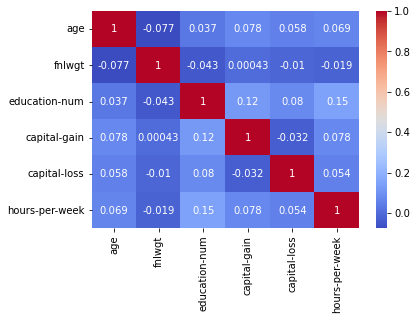

In [13]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm");

In [14]:
X=df[['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]

In [15]:
y=df['salary']

In [16]:
X = pd.get_dummies(X, drop_first=True)

In [72]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

In [73]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1,stratify=y)

In [20]:
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### we scale the data; we see that the dataset  which is somewhat imbalanced (more <50k)

In [21]:
y.value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [22]:
rfc=RandomForestClassifier(n_estimators=200)

In [23]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [24]:
rfc_pred=rfc.predict(X_test)

In [25]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      4945
        >50K       0.75      0.61      0.67      1568

    accuracy                           0.86      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513



### results show a 79% accuracy, with similar precision and recall (lower in >50k as the sample is smaller) for the random forest classifier

In [52]:
from imblearn.combine import SMOTETomek

In [53]:
st=SMOTETomek()

In [54]:
X_train_st,y_train_st=st.fit_resample(X_train,y_train)

In [55]:
classifier = LogisticRegression()
classifier.fit(X_train_st, y_train_st)
print(classification_report(y_test, classifier.predict(X_test)))

C:\Users\vasia\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

       <=50K       0.94      0.79      0.86      4945
        >50K       0.56      0.84      0.67      1568

    accuracy                           0.80      6513
   macro avg       0.75      0.81      0.76      6513
weighted avg       0.85      0.80      0.81      6513



In [56]:
from imblearn.combine import SMOTEENN

In [57]:
smenn=SMOTEENN()

In [58]:
X_train_smenn,y_train_smenn=smenn.fit_resample(X_train,y_train)

In [59]:
classifier = RandomForestClassifier()
classifier.fit(X_train_smenn, y_train_smenn)
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

       <=50K       0.94      0.82      0.87      4945
        >50K       0.59      0.82      0.69      1568

    accuracy                           0.82      6513
   macro avg       0.76      0.82      0.78      6513
weighted avg       0.85      0.82      0.83      6513



### we applied 2 different advanced balancing techniques, with a bit better results overall (around 82%), only precision for over 50 was npt satisfactory

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}

In [28]:
lr=LogisticRegression()

In [29]:
grid_search = GridSearchCV(estimator = lr, param_grid = param_grid_lr, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [30]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


C:\Users\vasia\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_iter': [20, 50, 100, 200, 500, 1000],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=2)

In [31]:
lr_pred=grid_search.predict(X_test)

In [32]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

       <=50K       0.94      0.80      0.86      4945
        >50K       0.57      0.83      0.67      1568

    accuracy                           0.81      6513
   macro avg       0.75      0.82      0.77      6513
weighted avg       0.85      0.81      0.82      6513



### weight balanced logistic regression gave us similar results

In [33]:
from sklearn.ensemble import BaggingClassifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
bc = BaggingClassifier()

In [36]:
n_estimators = [100, 300, 500, 800, 1200]
max_samples = [5, 10, 25, 50, 100]
max_features = [1, 2, 5, 10, 13]
hyperbag = dict(n_estimators = n_estimators, max_samples = max_samples, 
              max_features = max_features)
grid = GridSearchCV(bc, hyperbag, cv = 3, verbose = 1, n_jobs = -1)

In [37]:
bc_grid = grid.fit(X_train, y_train)

Fitting 3 folds for each of 125 candidates, totalling 375 fits


In [38]:
grid.best_params_

{'max_features': 13, 'max_samples': 100, 'n_estimators': 800}

In [39]:
bc1 = BaggingClassifier(max_features=13, max_samples=100,n_estimators= 100)
bc1.fit(X_train,y_train)

BaggingClassifier(max_features=13, max_samples=100, n_estimators=100)

In [40]:
bc_pred=bc1.predict(X_test)

In [41]:
print(classification_report(y_test,bc_pred))

              precision    recall  f1-score   support

       <=50K       0.76      1.00      0.87      4945
        >50K       1.00      0.02      0.04      1568

    accuracy                           0.76      6513
   macro avg       0.88      0.51      0.45      6513
weighted avg       0.82      0.76      0.67      6513



### bagging classifier gave us strange results, which make the model not preferable

In [111]:
import xgboost as xgb

C:\Users\vasia\anaconda3\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [49]:
param={"learning_rate"    : [0.15, 0.30 ] ,
 "max_depth"        : [ 3, 5,10],
 "min_child_weight" : [ 1, 3, 5],
 "gamma"            : [ 0.1 ,0.4 ],
 "colsample_bytree" : [ 0.3, 0.7 ] }

In [115]:
from xgboost.sklearn import XGBClassifier

In [51]:
xgb=XGBClassifier()

In [52]:
grid = GridSearchCV(xgb, param, cv = 3, verbose = 1, n_jobs = -1)

In [53]:
xgb_grid = grid.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


C:\Users\vasia\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:00:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [54]:
grid.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.1,
 'learning_rate': 0.15,
 'max_depth': 5,
 'min_child_weight': 3}

In [57]:
bg = XGBClassifier(colsample_bytree=0.3, gamma= 0.1, learning_rate= 0.15, max_depth= 5, min_child_weight= 3)
bg.fit(X_train,y_train)

C:\Users\vasia\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:03:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
bg_pred=bg.predict(X_test)

In [60]:
print(classification_report(y_test,bg_pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.95      0.92      4945
        >50K       0.79      0.63      0.70      1568

    accuracy                           0.87      6513
   macro avg       0.84      0.79      0.81      6513
weighted avg       0.86      0.87      0.86      6513



### with xgboosting we have similar results again with logistic regression and random forest

In [42]:
X1=df[['age', 'workclass', 'fnlwgt', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'hours-per-week']]

In [43]:
y=df['salary']

In [44]:
X1 = pd.get_dummies(X1, drop_first=True)

In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

In [46]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=.20, random_state=1,stratify=y)

In [48]:
scaler.fit(X1_train)
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

In [49]:
rfc=RandomForestClassifier(n_estimators=200,class_weight='balanced')

In [50]:
rfc.fit(X1_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200)

In [51]:
rfc_pred=rfc.predict(X1_test)

In [52]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      4945
        >50K       0.73      0.60      0.66      1568

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.78      6513
weighted avg       0.84      0.85      0.85      6513



### then we import mrmr to see the most important variables

In [106]:
from mrmr import mrmr_classif

In [48]:
selected_features = mrmr_classif(X1, y=y, K=10)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.60it/s]


In [49]:
selected_features

['marital-status_ Married-civ-spouse',
 'education-num',
 'capital-gain',
 'marital-status_ Never-married',
 'occupation_ Exec-managerial',
 'hours-per-week',
 'sex_ Male',
 'age',
 'occupation_ Prof-specialty',
 'relationship_ Not-in-family']

In [62]:
selected_features2 = mrmr_classif(X, y=y, K=10)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.45it/s]


In [63]:
selected_features2

['marital-status_ Married-civ-spouse',
 'education_ HS-grad',
 'capital-gain',
 'education-num',
 'marital-status_ Never-married',
 'hours-per-week',
 'capital-loss',
 'occupation_ Exec-managerial',
 'sex_ Male',
 'age']

### then we try feature engineering to see if we can improve results after it: we devide most columns in a few new classes

In [18]:
df['capital-gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital-gain, Length: 119, dtype: int64

In [19]:
df[df['capital-gain']>0].groupby('salary')['salary'].count()

salary
 <=50K    1035
 >50K     1677
Name: salary, dtype: int64

In [20]:
df['capital-gain'].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

In [21]:
lst1=[2174, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060]

In [22]:
def Getgain(amount):
    if amount in lst1:
        return "capital_gains>0"
    else:
        return "capital_gains_0"

In [23]:
df['capital_gains'] = df['capital-gain'].apply(lambda x: Getgain(x))

In [24]:
df[df['capital-loss']>0].groupby('salary')['salary'].count()

salary
 <=50K    746
 >50K     773
Name: salary, dtype: int64

In [25]:
df[df['capital-loss']==0].groupby('salary')['salary'].count()

salary
 <=50K    23974
 >50K      7068
Name: salary, dtype: int64

In [26]:
df['capital-loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

In [27]:
lst2=[2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411]

In [28]:
def Getloss(amount):
    if amount in lst2:
        return "capital_loss>0"
    else:
        return "capital_loss_0"

In [29]:
df['capital_loss'] = df['capital-loss'].apply(lambda x: Getloss(x))

In [30]:
df[df['hours-per-week']<40].groupby('salary')['salary'].count()

salary
 <=50K    7025
 >50K      738
Name: salary, dtype: int64

In [31]:
df[df['hours-per-week']==40].groupby('salary')['salary'].count()

salary
 <=50K    11970
 >50K      3247
Name: salary, dtype: int64

In [32]:
df[df['hours-per-week']>40].groupby('salary')['salary'].count()

salary
 <=50K    5725
 >50K     3856
Name: salary, dtype: int64

In [33]:
df['hours-per-week'].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

In [34]:
low_hours=[13, 16, 30, 35,20,  15, 25, 38, 
       32,  2, 22,  28, 36, 24,  12, 1, 10,
       34, 33, 8,  6,  19, 18, 5,  9, 37, 21, 26,
       14,  4,  7, 39, 11,3, 17,
        27, 31, 23, 29]

In [35]:
high_hours=[45, 50, 80,60, 52, 44,43, 55, 48, 58,70,56, 41, 46, 42,65,75, 98,54,64,72,47,59,99,53,62, 57, 78, 90, 66,49, 84,68,85,51,77,63,  87, 88, 73, 89, 97, 94,96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95]

In [36]:
def Gethours(hours):
    if hours in low_hours:
        return "<40 hours"
    elif hours in high_hours:
        return ">40 hours"
    else:
        return "40 hours"

In [37]:
df['hours'] = df['hours-per-week'].apply(lambda x: Gethours(x))

In [38]:
df[df['education-num']>=13].groupby('salary')['salary'].count()

salary
 <=50K    4158
 >50K     3909
Name: salary, dtype: int64

In [39]:
df['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [40]:
high_edu=[13,14,15,16]

In [41]:
def Getedu(edu):
    if edu in high_edu:
        return "higher_education"
    else:
        return "lower_education"

In [42]:
df['education'] = df['education-num'].apply(lambda x: Getedu(x))

In [43]:
df.groupby(['race','salary'])['salary'].count()

race                 salary
 Amer-Indian-Eskimo   <=50K      275
                      >50K        36
 Asian-Pac-Islander   <=50K      763
                      >50K       276
 Black                <=50K     2737
                      >50K       387
 Other                <=50K      246
                      >50K        25
 White                <=50K    20699
                      >50K      7117
Name: salary, dtype: int64

In [44]:
lst3=['White','Asian-Pac-Islander']

In [45]:
lst4=['Black','Amer-Indian-Eskimo','Other']

In [46]:
def Getrace(race):
    if race in lst3:
        return "race_1"
    else:
        return "race_2"

In [47]:
df['race_cl'] = df['race'].apply(lambda x: Getrace(x))

In [48]:
df.groupby(['workclass','salary'])['salary'].count()

workclass          salary
 ?                  <=50K     1645
                    >50K       191
 Federal-gov        <=50K      589
                    >50K       371
 Local-gov          <=50K     1476
                    >50K       617
 Never-worked       <=50K        7
                    >50K         0
 Private            <=50K    17733
                    >50K      4963
 Self-emp-inc       <=50K      494
                    >50K       622
 Self-emp-not-inc   <=50K     1817
                    >50K       724
 State-gov          <=50K      945
                    >50K       353
 Without-pay        <=50K       14
                    >50K         0
Name: salary, dtype: int64

In [49]:
df.groupby(['marital-status','salary'])['salary'].count()

marital-status          salary
 Divorced                <=50K     3980
                         >50K       463
 Married-AF-spouse       <=50K       13
                         >50K        10
 Married-civ-spouse      <=50K     8284
                         >50K      6692
 Married-spouse-absent   <=50K      384
                         >50K        34
 Never-married           <=50K    10192
                         >50K       491
 Separated               <=50K      959
                         >50K        66
 Widowed                 <=50K      908
                         >50K        85
Name: salary, dtype: int64

In [50]:
df['marital-status'].unique()

[' Never-married', ' Married-civ-spouse', ' Divorced', ' Married-spouse-absent', ' Separated', ' Married-AF-spouse', ' Widowed']
Categories (7, object): [' Divorced', ' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married', ' Separated', ' Widowed']

In [51]:
lst5=[' Never-married',  ' Divorced', ' Married-spouse-absent', ' Separated',  ' Widowed']

In [52]:
def Getmarital(marital):
    if marital in lst5:
        return "class_B"
    else:
        return "class_A"

In [53]:
df['marital'] = df['marital-status'].apply(lambda x: Getmarital(x))

In [54]:
df.groupby(['native-country','salary'])['salary'].count().sort_values()

native-country               salary
 Outlying-US(Guam-USVI-etc)   >50K         0
 Holand-Netherlands           >50K         0
 Honduras                     >50K         1
 Holand-Netherlands           <=50K        1
 Nicaragua                    >50K         2
                                       ...  
 ?                            >50K       146
                              <=50K      437
 Mexico                       <=50K      610
 United-States                >50K      7171
                              <=50K    21999
Name: salary, Length: 84, dtype: int64

In [55]:
def Getcountry(country):
    if country=='United-States':
        return 'US'
    else:
        return 'other'

In [56]:
df['country'] = df['native-country'].apply(lambda x: Getcountry(x))

In [112]:
df.groupby(['occupation','salary'])['salary'].count()

occupation          salary
 ?                   <=50K    1652
                     >50K      191
 Adm-clerical        <=50K    3263
                     >50K      507
 Armed-Forces        <=50K       8
                     >50K        1
 Craft-repair        <=50K    3170
                     >50K      929
 Exec-managerial     <=50K    2098
                     >50K     1968
 Farming-fishing     <=50K     879
                     >50K      115
 Handlers-cleaners   <=50K    1284
                     >50K       86
 Machine-op-inspct   <=50K    1752
                     >50K      250
 Other-service       <=50K    3158
                     >50K      137
 Priv-house-serv     <=50K     148
                     >50K        1
 Prof-specialty      <=50K    2281
                     >50K     1859
 Protective-serv     <=50K     438
                     >50K      211
 Sales               <=50K    2667
                     >50K      983
 Tech-support        <=50K     645
                     >50K   

In [89]:
lst6=['Tech-support','Sales','Protective-serv','Craft-repair']

In [90]:
lst7=['Exec-managerial','Prof-specialty']

In [108]:
def Getoccupation(occup_pay):
    if  occup_pay in lst7:
        return 'manager_spec_high'
    elif occup_pay in lst6:
        return 'sales_serv_med'
    else:
        return 'low_paid_occ'

In [109]:
df['occup_pay'] = df['occupation'].apply(lambda x: Getoccupation(x))

### ...and we get our new dataset

In [110]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,hours-per-week,native-country,salary,capital_gains,capital_loss,hours,race_cl,marital,country,occup_pay
0,39,State-gov,77516,higher_education,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,40,United-States,<=50K,capital_gains>0,capital_loss_0,40 hours,race_2,class_B,other,low_paid_occ
1,50,Self-emp-not-inc,83311,higher_education,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,13,United-States,<=50K,capital_gains_0,capital_loss_0,<40 hours,race_2,class_A,other,low_paid_occ
2,38,Private,215646,lower_education,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,40,United-States,<=50K,capital_gains_0,capital_loss_0,40 hours,race_2,class_B,other,low_paid_occ
3,53,Private,234721,lower_education,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,40,United-States,<=50K,capital_gains_0,capital_loss_0,40 hours,race_2,class_A,other,low_paid_occ
4,28,Private,338409,higher_education,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,40,Cuba,<=50K,capital_gains_0,capital_loss_0,40 hours,race_2,class_A,other,low_paid_occ


In [63]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary', 'capital_gains', 'capital_loss', 'hours', 'race_cl',
       'marital', 'country', 'occup_pay'],
      dtype='object')

In [99]:
X2=df[['age',  'sex', 
        'capital_gains', 'capital_loss', 'hours', 'race_cl',
       'marital', 'country', 'occup_pay']]

In [100]:
y=df['salary']

In [101]:
X2 = pd.get_dummies(X2, drop_first=True)

In [102]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=.20, random_state=1,stratify=y)

In [103]:
scaler.fit(X2_train)
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

In [104]:
rfc=RandomForestClassifier(n_estimators=200,class_weight='balanced')

In [105]:
rfc.fit(X2_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200)

In [106]:
rfc_pred=rfc.predict(X2_test)

In [107]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

       <=50K       0.92      0.74      0.82      4945
        >50K       0.49      0.81      0.61      1568

    accuracy                           0.75      6513
   macro avg       0.71      0.77      0.72      6513
weighted avg       0.82      0.75      0.77      6513



In [116]:
xgb=XGBClassifier()

In [117]:
param={"learning_rate"    : [0.15, 0.30 ] ,
 "max_depth"        : [ 3, 5,10],
 "min_child_weight" : [ 1, 3, 5],
 "gamma"            : [ 0.1 ,0.4 ],
 "colsample_bytree" : [ 0.3, 0.7 ] }

In [118]:
grid = GridSearchCV(xgb, param, cv = 3, verbose = 1, n_jobs = -1)

In [119]:
xgb_grid = grid.fit(X2_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


C:\Users\vasia\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:25:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [120]:
grid.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.4,
 'learning_rate': 0.15,
 'max_depth': 3,
 'min_child_weight': 3}

In [121]:
bg = XGBClassifier(colsample_bytree=0.3, gamma= 0.4, learning_rate= 0.3, max_depth= 3, min_child_weight= 3)
bg.fit(X2_train,y_train)

[20:25:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [122]:
bg_pred=bg.predict(X2_test)

In [123]:
print(classification_report(y_test,bg_pred))

              precision    recall  f1-score   support

       <=50K       0.84      0.92      0.88      4945
        >50K       0.64      0.47      0.54      1568

    accuracy                           0.81      6513
   macro avg       0.74      0.69      0.71      6513
weighted avg       0.80      0.81      0.80      6513



In [107]:
selected_features3 = mrmr_classif(X2, y=y, K=10)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  1.99it/s]


In [108]:
selected_features3

['marital_class_B',
 'capital_gains_capital_gains_0',
 'hours_>40 hours',
 'age',
 'capital_loss_capital_loss_0',
 'sex_ Male',
 'hours_<40 hours']

In [99]:
X3=df[['capital_gains',  'race_cl','education',
       'marital', 'occupation']]

In [100]:
y=df['salary']

In [101]:
X3 = pd.get_dummies(X3, drop_first=True)

In [102]:
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=.20, random_state=1,stratify=y)

In [103]:
scaler.fit(X3_train)
X3_train = scaler.fit_transform(X3_train)
X3_test = scaler.transform(X3_test)

In [104]:
rfc=RandomForestClassifier(n_estimators=200,class_weight='balanced')

In [105]:
rfc.fit(X3_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200)

In [106]:
rfc_pred=rfc.predict(X3_test)

In [107]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

       <=50K       0.94      0.73      0.82      4945
        >50K       0.50      0.86      0.63      1568

    accuracy                           0.76      6513
   macro avg       0.72      0.79      0.73      6513
weighted avg       0.83      0.76      0.78      6513



### however, results are again similar...

In [71]:
df.groupby(['hours','education','marital','salary'])['salary'].count()

hours      education         marital  salary
40 hours   higher_education  class_A   <=50K     510
                                       >50K     1142
                             class_B   <=50K    1361
                                       >50K      214
           lower_education   class_A   <=50K    3736
                                       >50K     1716
                             class_B   <=50K    6363
                                       >50K      175
<40 hours  higher_education  class_A   <=50K     265
                                       >50K      333
                             class_B   <=50K     692
                                       >50K       54
           lower_education   class_A   <=50K    1213
                                       >50K      299
                             class_B   <=50K    4855
                                       >50K       52
>40 hours  higher_education  class_A   <=50K     480
                                       >50K     1743
 

### nevertheless, it is quite clear now which variables are important, and which subgroups inside each variable. for example we see below that higher education and married civ spouse with 40 or more hours give a lot of over 50k. Other sub groups are for example executive as occupation or specialty (others are race white and asian, capital gain yes) as we see in the last groupby.

In [115]:
df[(df['education']=='higher_education')&(df['marital']=='class_A')].groupby(['hours','salary'])['salary'].count()

hours      salary
40 hours    <=50K     510
            >50K     1142
<40 hours   <=50K     265
            >50K      333
>40 hours   <=50K     480
            >50K     1743
Name: salary, dtype: int64

In [116]:
df[(df['education']=='higher_education')&(df['marital']=='class_A')].groupby(['occupation','salary'])['salary'].count()

occupation          salary
 ?                   <=50K      78
                     >50K       73
 Adm-clerical        <=50K      85
                     >50K      123
 Armed-Forces        <=50K       0
                     >50K        1
 Craft-repair        <=50K      81
                     >50K       92
 Exec-managerial     <=50K     239
                     >50K     1027
 Farming-fishing     <=50K      39
                     >50K       24
 Handlers-cleaners   <=50K      14
                     >50K       10
 Machine-op-inspct   <=50K      28
                     >50K       19
 Other-service       <=50K      40
                     >50K       19
 Priv-house-serv     <=50K       1
                     >50K        0
 Prof-specialty      <=50K     403
                     >50K     1284
 Protective-serv     <=50K      19
                     >50K       53
 Sales               <=50K     170
                     >50K      388
 Tech-support        <=50K      33
                     >50K   

### Finally, we can say that 0.8 as an outcome for our classification models is not bad, as we have 2 classes that some of their values are very close : over 50 and less than 50 are very close in the range 45-55 for example and this can cause a loss of accuracy.